In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [8]:
# Read the data into a pandas dataframe
df= pd.read_csv("Recruitment_Data_updated.csv")
df.head()


,attrition,performance_rating,sales_quota_pct,recruiting_source
0,0.000707,2.976686,0.604739,Applied Online
1,-0.019452,2.989157,0.396567,NaN
2,-0.009998,2.993355,0.206242,Applied Online
3,-0.003004,1.989966,-0.475037,NaN
4,-0.025405,3.016559,0.345470,Campus


The dataset has the following characteristics:

Shape: 107,354 rows and 4 columns.

Columns:	

•	Attrition:  A numerical value (possibly normalized or scaled) representing attrition.
•	Performance_rating: Performance ratings of individuals, also numerical.
•	Sales_quota_pct:  Percentage of sales quota achieved by an individual.
•	Recruiting_source:  The source through which the individual was recruited, containing categorical values like "Applied Online," "Campus," etc., with some missing entries.
ource.

Task:-

Get Average Sales Numbers and Attrition Numbers

•	Print out the average Sales Number grouped by Recruiting Source
•	Print out the average Attrition Number grouped by Recruiting Source
•	Take a look at these numbers to get an idea about how each Source is performing on these numbers - Keep in mind that we are looking for sources that have high Sales numbers and low Attrition numbers.


In [9]:
#Print out the average Sales Number grouped by Recruiting Source

# Group the data by recruiting_source and calculate the mean of Sales Number
sales_by_source = df.groupby('recruiting_source')['sales_quota_pct'].mean()

# Print out the result
print(sales_by_source)


recruiting_source
Applied Online    1.080959
Campus            1.076408
Referral          1.075538
Search Firm       1.103426
Name: sales_quota_pct, dtype: float64


In [22]:
#Print out the average Attrition Number grouped by recruiting_source
avg_attrition_by_source = df.groupby('recruiting_source')['attrition'].mean()
print(avg_attrition_by_source)


recruiting_source
Applied Online    0.213370
Campus            0.215109
Referral          0.214920
Search Firm       0.208177
Name: attrition, dtype: float64


In [23]:
#Take a look at these numbers to get an idea about how each Source is performing on these numbers - Keep in mind 
#that we are looking for sources that have high Sales numbers and low Attrition numbers.

# merge the two data frames on recruiting_source column
performance_df = pd.merge(sales_by_source, avg_attrition_by_source, on='recruiting_source')

# sort the data frame by sales numbers and attrition numbers
performance_df = performance_df.sort_values(by=['sales_quota_pct', 'attrition'], ascending=[False, True])

# print the sorted data frame
print(performance_df)


                   sales_quota_pct  attrition
recruiting_source                            
Search Firm               1.103426   0.208177
Applied Online            1.080959   0.213370
Campus                    1.076408   0.215109
Referral                  1.075538   0.214920


Step 1: Visualize Attrition Differences by Recruiting Source
•	Create a bar chart showing the average attrition rate for each recruiting source.
•	Highlight differences and trends in attrition rates to identify sources with higher or lower attrition.
 

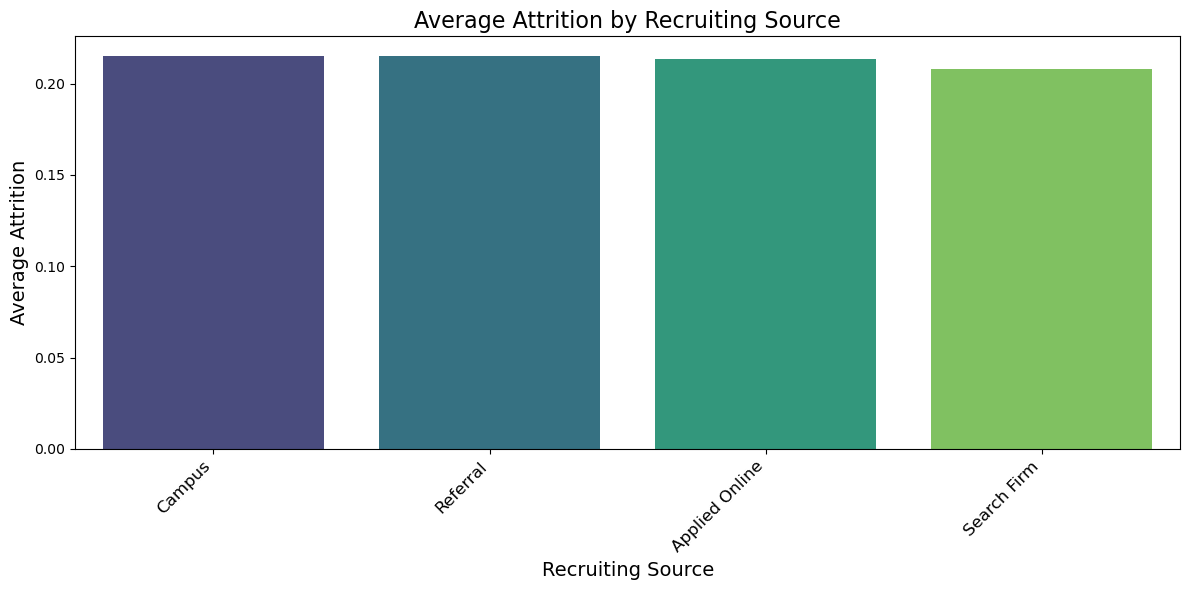

In [31]:
data_cleaned = data.dropna(subset=['recruiting_source', 'attrition'])

# Group by recruiting source and calculate average attrition
attrition_by_source = data_cleaned.groupby('recruiting_source')['attrition'].mean().reset_index()

# Plot the chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=attrition_by_source.sort_values(by='attrition', ascending=False),
    x='recruiting_source',
    y='attrition',
    palette='viridis'
)

# Customize the chart
plt.title('Average Attrition by Recruiting Source', fontsize=16)
plt.xlabel('Recruiting Source', fontsize=14)
plt.ylabel('Average Attrition', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

Justification & Analysis Plan
1.	Purpose of the Chart: To identify which recruiting sources yield the best sales performance based on the average sales quota percentage achieved by individuals from each source.
2.	Key Metrics: The y-axis shows the average sales_quota_pct, and the x-axis lists the recruiting sources.
3.	Interpretation for Stakeholders: This visualization will highlight which recruiting sources are more effective at bringing in high-performing sales talent.
    Stakeholders can use this information to prioritize recruitment efforts and resources toward those sources.

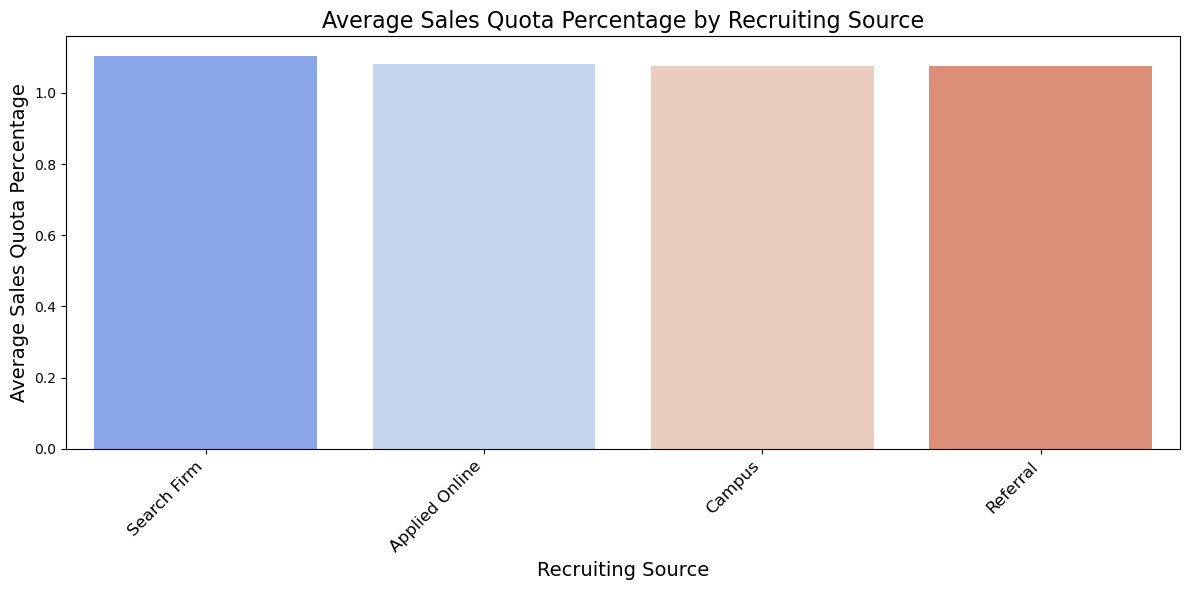

In [33]:
# Clean and preprocess the data
data_cleaned = data.dropna(subset=['recruiting_source', 'sales_quota_pct'])

# Group by recruiting source and calculate average sales quota percentage
sales_by_source = data_cleaned.groupby('recruiting_source')['sales_quota_pct'].mean().reset_index()

# Plot the chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=sales_by_source.sort_values(by='sales_quota_pct', ascending=False),
    x='recruiting_source',
    y='sales_quota_pct',
    palette='coolwarm'
)

# Customize the chart
plt.title('Average Sales Quota Percentage by Recruiting Source', fontsize=16)
plt.xlabel('Recruiting Source', fontsize=14)
plt.ylabel('Average Sales Quota Percentage', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
Step 2: Visualize Sales Differences by Recruiting Source

Generate a bar chart showing the average sales_quota_pct by recruiting source.
Identify which recruiting sources consistently meet or exceed sales targets.


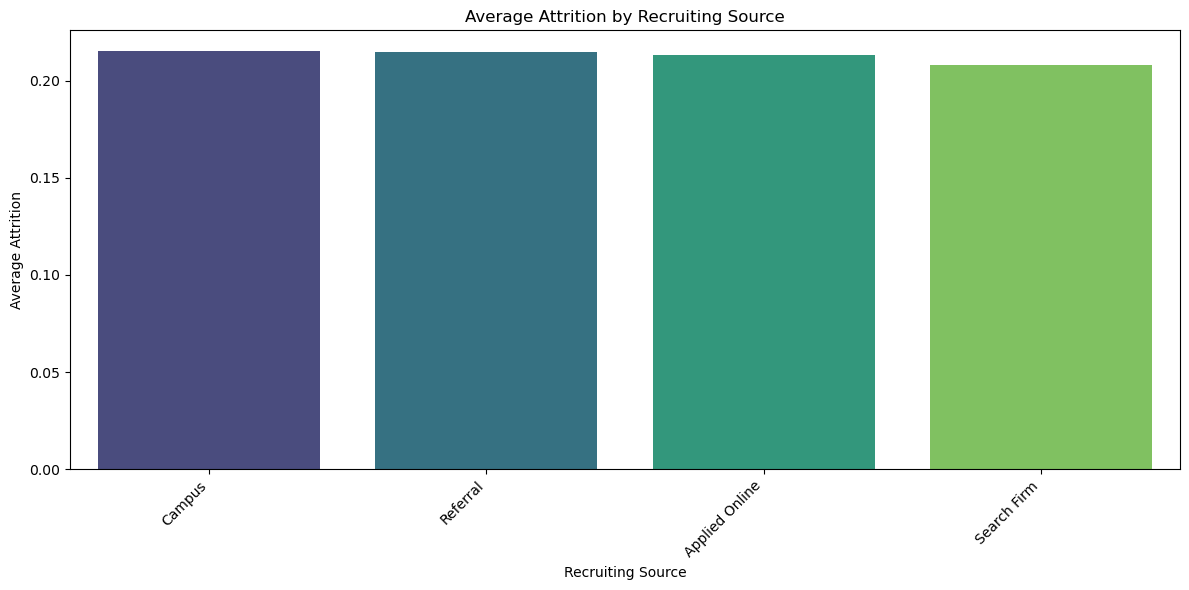

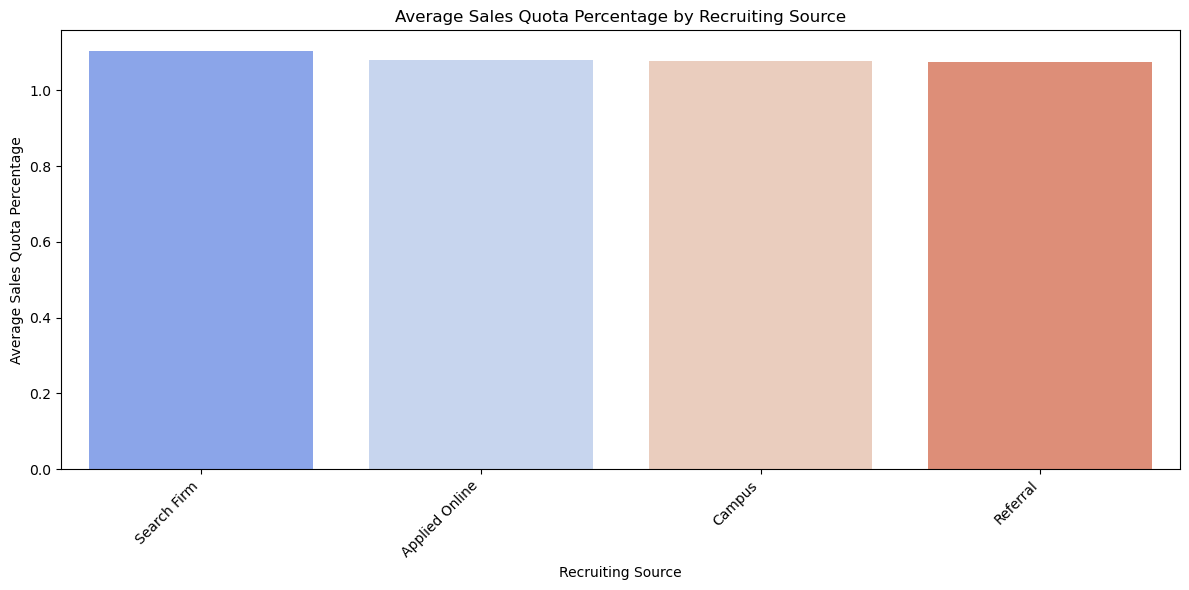

In [34]:
# Clean data
data_cleaned = data.dropna(subset=['recruiting_source', 'attrition', 'sales_quota_pct'])

# Visualization 1: Attrition by Recruiting Source
attrition_by_source = data_cleaned.groupby('recruiting_source')['attrition'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=attrition_by_source.sort_values(by='attrition', ascending=False),
    x='recruiting_source',
    y='attrition',
    palette='viridis'
)
plt.title('Average Attrition by Recruiting Source')
plt.xlabel('Recruiting Source')
plt.ylabel('Average Attrition')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualization 2: Sales Quota Percentage by Recruiting Source
sales_by_source = data_cleaned.groupby('recruiting_source')['sales_quota_pct'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=sales_by_source.sort_values(by='sales_quota_pct', ascending=False),
    x='recruiting_source',
    y='sales_quota_pct',
    palette='coolwarm'
)
plt.title('Average Sales Quota Percentage by Recruiting Source')
plt.xlabel('Recruiting Source')
plt.ylabel('Average Sales Quota Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Step 3: Combine Insights

Analyze both visualizations together.

Identify recruiting sources that balance low attrition and high sales performance.
Use data trends to prioritize effective recruiting sources.

Step 4: Draw Conclusions

Draft inferences based on:

1.	Attrition Analysis
:
o	Which sources show low attrition rates, indicating better retention?
o	Are there sources with exceptionally high attrition rates to be reconsider
ed?
2.	Sales Performance:
o	Which sources consistently yield high sales performance?
o	Are there sources with underperforming sales metrics?

